In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Читаем файл
df = pd.read_csv('UkraineConflict.csv')
df = df.sort_values(by=['TIMESTAMP'])
df

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
9775,UKR9360,14-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,West Coast of Kherson,45.986,31.970,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 14 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
9718,UKR9273,13-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,Coast of Mykolaiv,46.415,31.196,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 13 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
9654,UKR9227,12-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,East Coast of Kherson,45.997,35.327,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 12 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
9616,UKR9180,11-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,Coast of Zaporizhia,46.358,36.271,2,Liveuamap; 112 Ukrayina; Ukrainian Military Po...,Local partner-New media,"On 11 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
10294,UKR9824,25-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Russia (2000-),NaN,8,...,Coast of Donetsk,46.691,37.282,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 25 September 2018, at Coast of Donetsk, Rus...",0,NaN,1571164407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86746,UKR86755,01-January-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,Inhulivka,46.902,32.942,1,Ministry of Defence of Ukraine,Other,"On 1 January 2023, Russian forces shelled Inhu...",0,NaN,1679437290
84924,UKR84888,15-December-2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,Inhulivka,46.902,32.942,2,Ministry of Defence of Ukraine,Other,"On 15 December 2022, Russian forces shelled th...",0,NaN,1679437290
83416,UKR83163,02-December-2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,Inhulivka,46.902,32.942,2,Ministry of Defence of Ukraine,Other,"On 2 December 2022, Russian forces shelled nea...",0,NaN,1679437290
80768,UKR80799,11-November-2022,2022,1,Strategic developments,Strategic developments,Non-violent transfer of territory,Military Forces of Ukraine (2019-),NaN,1,...,Inhulivka,46.902,32.942,1,Institute for the Study of War,Other,"On 11 November 2022, following the Russian wit...",0,NaN,1679437290


In [5]:
print(f"Всего {df.isna().sum().sum()} пропущенных значений")
print(f"Всего {df.duplicated().sum()} повторяющихся значений")

Всего 399799 пропущенных значений
Всего 0 повторяющихся значений


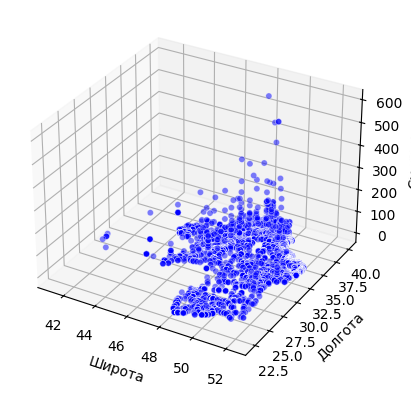

In [6]:

# Диаграмма рассеивания
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df['LATITUDE']
y = df['LONGITUDE']
z = df['FATALITIES']
# улучшить читаемость, градиент.
ax.scatter(x, y, z, color = "blue", edgecolors = "white", linewidths = 0.4, alpha = 0.5)
ax.set_xlabel('Широта')
ax.set_ylabel('Долгота')
ax.set_zlabel('Смерти')
plt.show()


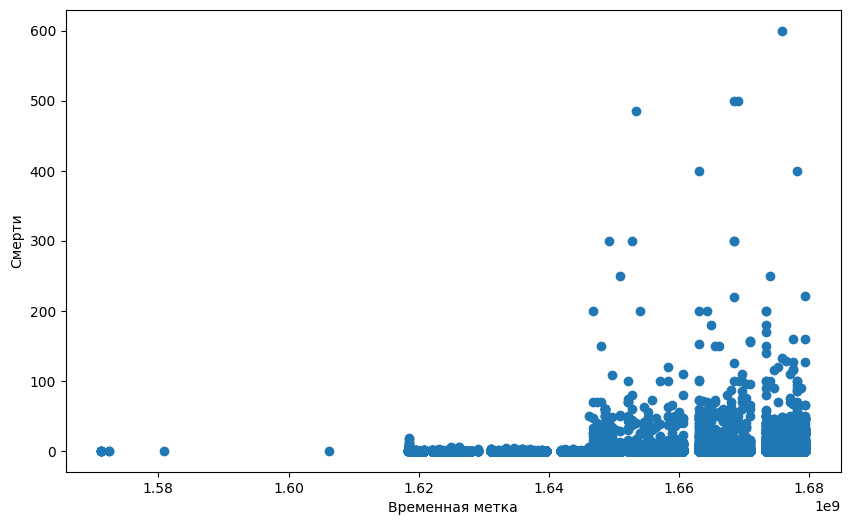

In [7]:

# Диаграмма рассеивания
flg, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=df['TIMESTAMP'], y=df['FATALITIES'])
plt.xlabel("Временная метка")
plt.ylabel("Смерти")
plt.show()


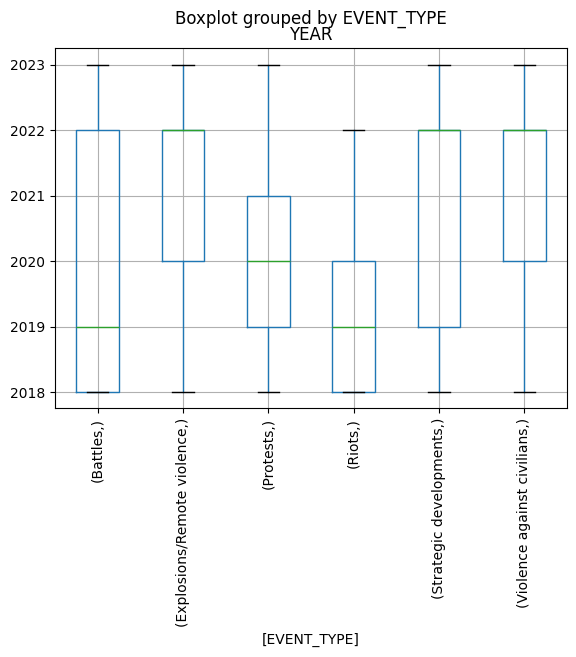

In [8]:

# Ящик с усами
df.boxplot(column=['YEAR'], by=['EVENT_TYPE'], rot=90)
plt.show()

<Axes: >

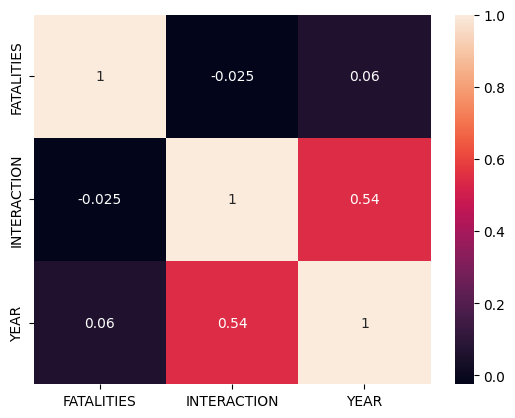

In [9]:
# кореляционная матрица
corr_df = df[['FATALITIES', 'INTERACTION', 'YEAR']]
corr = corr_df.corr()
sns.heatmap(corr, annot=True)


In [10]:
df['EVENT_TYPE'] = pd.factorize(df['EVENT_TYPE'])[0]
df['EVENT_TYPE']

9775     0
9718     0
9654     0
9616     0
10294    0
        ..
86746    2
84924    2
83416    2
80768    0
95264    2
Name: EVENT_TYPE, Length: 96082, dtype: int64

array([[<Axes: title={'center': 'YEAR'}>]], dtype=object)

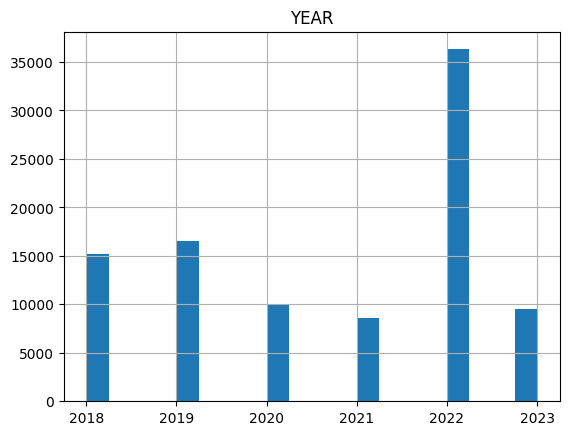

In [11]:
# гистограмма

df.hist(column='YEAR', bins=20)


/tmp/ipykernel_9013/1907374205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df['FATALITIES'] = (norm_df['FATALITIES']-norm_df['FATALITIES'].median())/norm_df['FATALITIES'].std()
/tmp/ipykernel_9013/1907374205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df['INTERACTION'] = (df['INTERACTION']-df['INTERACTION'].median())/df['INTERACTION'].std()
/tmp/ipykernel_9013/1907374205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

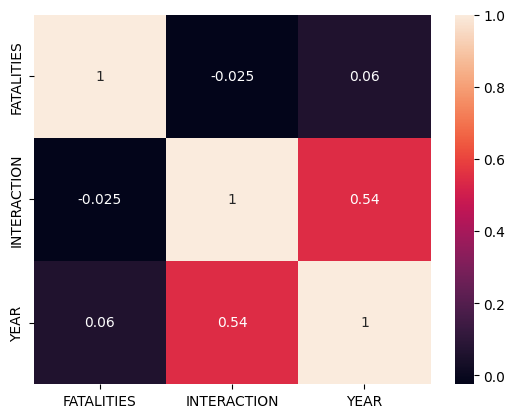

In [23]:
norm_df = df[['FATALITIES', 'INTERACTION', 'YEAR', 'EVENT_TYPE', 'COUNTRY', 'ADMIN1']]
norm_df['FATALITIES'] = (norm_df['FATALITIES']-norm_df['FATALITIES'].median())/norm_df['FATALITIES'].std()
norm_df['INTERACTION'] = (df['INTERACTION']-df['INTERACTION'].median())/df['INTERACTION'].std()
norm_df['YEAR'] = (df['YEAR']-df['YEAR'].median())/df['YEAR'].std()
norm_df['EVENT_TYPE'] = pd.factorize(norm_df['EVENT_TYPE'])[0]
corr_df = norm_df[['FATALITIES', 'INTERACTION', 'YEAR']]
corr = corr_df.corr()
sns.heatmap(corr, annot=True)
norm_df.to_csv(r'df_preprocessed.csv', index= False )


In [29]:
def country_to_number(df):
    if df['COUNTRY'] == 'Turkey':
        val = 0
    elif df['COUNTRY'] == 'Ukraine':
        val = 1
    else:
        val = 2
    return val

def admin_to_number(df):
    if df['ADMIN1'] == 'Donetsk':
        val = 0
    elif df['ADMIN1'] == 'Luhansk':
        val = 1
    else:
        val = 2
    return val

In [32]:
norm_df['country_num'] = norm_df.apply(country_to_number, axis=1)
norm_df['country_num'] = (norm_df['country_num']-norm_df['country_num'].median())/norm_df['country_num'].std()
norm_df['admin_num'] = norm_df.apply(admin_to_number, axis=1)
norm_df['admin_num'] = (norm_df['admin_num']-norm_df['admin_num'].median())/norm_df['admin_num'].std()
df_prep = norm_df[['FATALITIES','YEAR', 'INTERACTION', 'EVENT_TYPE', 'country_num', 'admin_num']]
df_prep.to_csv(r'df_preprocessed.csv', index= False )
df_prep

/tmp/ipykernel_9013/3101718835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df['country_num'] = norm_df.apply(country_to_number, axis=1)
/tmp/ipykernel_9013/3101718835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df['country_num'] = (norm_df['country_num']-norm_df['country_num'].median())/norm_df['country_num'].std()
/tmp/ipykernel_9013/3101718835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,FATALITIES,YEAR,INTERACTION,EVENT_TYPE,country_num,admin_num
9775,0.0,-1.771717,-0.265106,0,0.0,2.237773
9718,0.0,-1.771717,-0.265106,0,0.0,2.237773
9654,0.0,-1.771717,-0.265106,0,0.0,2.237773
9616,0.0,-1.771717,-0.265106,0,0.0,2.237773
10294,0.0,-1.771717,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...
86746,0.0,1.181145,2.054573,2,0.0,2.237773
84924,0.0,0.590572,0.000000,2,0.0,2.237773
83416,0.0,0.590572,2.054573,2,0.0,2.237773
80768,0.0,0.590572,0.000000,0,0.0,2.237773
